In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from matplotlib.patches import Wedge
import pandas as pd  # 导入 pandas 库

In [71]:
# 定义物理参数
c = 1500  # 声速，单位：m/s
rho0 = 1000  # 介质密度，单位：kg/m^3
f = 4e6  # 频率，单位：Hz
k = 2 * np.pi * f / c  # 波数
w = 2 * np.pi * f  # 角频率
u = 1  # 质点振动速度

In [72]:
# 定义环形相控阵参数
m = 6  # 圆环个数
lambda_ = c / f  # 波长
R_max = 7.78e-3  # 中心阵元到最大辐射圆环中心的距离，单位：m
F = 10e-3  # 聚焦焦距，单位：m
Nmax = 15e-3 #近场临界ju
n = 0.7 #(m - 1) / m  # 圆环间距与波长的倍数系数
delta_d = n * lambda_  # 圆环之间的间距
# 定义 theta 范围
theta_values = np.linspace(-np.pi/2 , np.pi /2, 1000)

# 固定 r、phi 和 t 的值
r = F  # 可根据需要调整 r 的值
phi = 0
t = 0

In [73]:
all_data = []  # 用于存储所有 m 值对应的圆环阵列数据
mainlobe_avg_list = []
sidelobe_avg_list = []
Ri_list = np.zeros(m)
Ro_list = np.zeros(m)
a1_list = []  # 存储每个圆环的a1值
a2_list = []  # 存储每个圆环的a2值

In [74]:
# 定义 theta 范围
theta_values = np.linspace(-np.pi/2 , np.pi /2, 1000)

In [75]:
def save_annular_array_parameters(m,a1_list,a2_list):
    data = {
        'm值': [m] * m,  # 添加 m 值列
        '环编号': [i + 1 for i in range(m)],
        '内径 (mm)': [f'{a1*1000:.6f}' for a1 in a1_list],
        '外径 (mm)': [f'{a2*1000:.6f}' for a2 in a2_list]
    }
    df = pd.DataFrame(data)
    all_data.append(df)

    # 合并所有 DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)

    # 保存到同一个 CSV 文件
    csv_file_path = 'annular_array_parameters_all.csv'
    combined_df.to_csv(csv_file_path, index=False)
    # print(f"所有 m 值对应的圆环阵列参数已保存到 {csv_file_path}")


In [76]:
# 封装计算等宽圆环内外径的代码为函数
def calculate_annular_radii(R_max, m, n, NFmax): 
    a1_list = []  # 存储每个圆环的a1值
    a2_list = []  # 存储每个圆环的a2值    
    # 定义环形相控阵参数
    delta_d = n * lambda_  # 圆环之间的间距
    # 定义 theta 范围
    rmin = np.sqrt(NFmax*lambda_)
    avgW = (R_max - rmin - (m - 1)*delta_d) / m
    for i in range(m):
        if i == 0:
            a1 = 0
            if avgW <= rmin:
                a2 = rmin
        else:
            a1 = a2_list[i - 1] + delta_d
        a2 = a1 + avgW
        t_r = (a2 ** 2 - a1 ** 2)
        if t_r/lambda_ <= NFmax :
            a2 = np.sqrt(a1 ** 2 + rmin**2)
        a2_list.append(a2)
        a1_list.append(a1)
    # save_annular_array_parameters(m,a1_list,a2_list)
    return a1_list, a2_list

In [77]:
# 封装计算等宽圆环内外径的代码为函数
def calculate_annular_radii_w(we, m, delta_d):
    a1_list = []  # 存储每个圆环的a1值
    a2_list = []  # 存储每个圆环的a2值     
    for i in range(m):
        if i == 0:
            a1 = 0
        else:
            a1 = a2_list[i - 1] + delta_d
        a2 = a1 + we
        a2_list.append(a2)
        a1_list.append(a1)
    # save_annular_array_parameters(m)
    return a1_list, a2_list

In [78]:
# 定义颜色列表
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

In [79]:
# 封装绘制圆环阵列的代码为函数
def plot_annular_array(inner_radii, outer_radii, colors):
    fig, ax = plt.subplots()
    for i, (a1, a2) in enumerate(zip(inner_radii, outer_radii)):
        # 使用 Wedge 绘制中间有填充的环形
        ring = Wedge((0, 0), a2, 0, 360, width=(a2 - a1))
        # 从颜色列表中选取颜色进行填充
        color = colors[i % len(colors)]
        ring.set_facecolor(color)
        ring.set_edgecolor(color)
        ax.add_artist(ring)

        # 计算圆环面积
        area = np.pi * (a2**2 - a1**2)*1e6
        # 确定标注位置（圆环中心角度位置）
        label_r = (a1 + a2) / 2
        label_theta = 45  # 角度可以根据需要调整
        label_x = label_r * np.cos(np.radians(label_theta))
        label_y = label_r * np.sin(np.radians(label_theta))
        # 显示面积标注
        ax.text(label_x, label_y, f'area:{area:.2f}mm2', ha='left', va='center', color='black', fontsize=6)

    ax.set_xlim(-a1  * 1.5, a2  * 1.5)
    ax.set_ylim(-a1  * 1.5, a2  * 1.5)
    ax.set_aspect('equal')
    ax.set_title('Annular Array')
    plt.show()

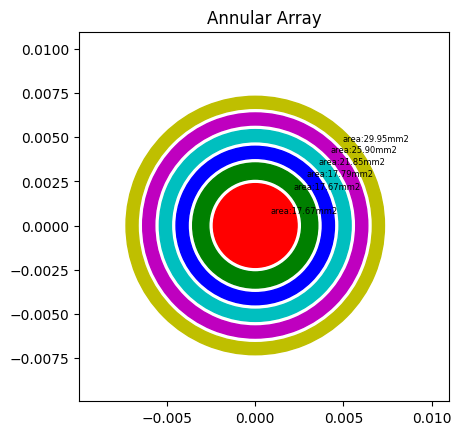

In [80]:
Ri_list, Ro_list = calculate_annular_radii(R_max,m,n,Nmax)
# 调用函数绘制圆环阵列
plot_annular_array(Ri_list, Ro_list, colors)

In [81]:
# 定义声压公式，考虑分母为 0 的情况
def annular_array_pressure(a1_list,a2_list, F, r, m, theta, phi, t):
    p_total = 0
    epsilon = 1e-20  # 一个极小值，用于避免分母为 0
    Rm_max = 2/3*(a2_list[m-1]**3 - a2_list[m-2]**3)/(a2_list[m-1]**2-a2_list[m-2]**2)
    for i in range(m):
        a1 = a1_list[i]
        a2 = a2_list[i]
        R_m = 2/3*(a2**3 - a1**3)/(a2**2-a1**2)
        
        t_m = (np.sqrt(Rm_max ** 2 + F ** 2) - F - (np.sqrt(R_m ** 2 + F ** 2) - F)) / c
        denominator1 = k * a2 * np.cos(phi) * np.sin(theta)
        denominator2 = k * a1 * np.cos(phi) * np.sin(theta)

        # 计算 term1
        if np.abs(denominator1) < epsilon:
            # 当分母接近 0 时，使用贝塞尔函数极限性质
            term1 = a2 / 2
        else:
            term1 = (a2 ** 2 * j1(k * a2 * np.cos(phi) * np.sin(theta))) / denominator1

        # 计算 term2
        if np.abs(denominator2) < epsilon:
            # 当分母接近 0 时，使用贝塞尔函数极限性质
            term2 = a1 / 2
        else:
            term2 = (a1 ** 2 * j1(k * a1 * np.cos(phi) * np.sin(theta))) / denominator2

        p = (1j * k * rho0 * c * u / r) * (term1 - term2) * np.exp(1j * (2 * np.pi * f * t_m - k * r))
        p_total += p
    return p_total

In [82]:
# 定义评价声压旁瓣和主瓣的平均函数
def evaluate_sidelobe_mainlobe(pressure_values):
    # 找到最大声压值及其索引
    num = len(pressure_values)
    max_pressure = max(pressure_values)
    max_index = pressure_values.index(max_pressure)
    # print("Mid num:",num/2, "max index:",max_index)

    if max_index < num / 2:
        max_index = int(num / 2)

    # 简单假设主瓣是最大声压值左右各 5 个点的范围，可根据实际情况调整
    mainlobe_start = max(0, max_index - 5)
    mainlobe_end = min(len(pressure_values), max_index + 5)

    # 计算主瓣的平均声压
    mainlobe_pressures = pressure_values[mainlobe_start:mainlobe_end]
    mainlobe_avg = np.mean(mainlobe_pressures)

    # 找出所有峰值点
    peaks = []
    for i in range(1, len(pressure_values) - 1):
        if pressure_values[i] > pressure_values[i - 1] and pressure_values[i] > pressure_values[i + 1]:
            peaks.append(pressure_values[i])

    # 排除主瓣范围内的峰值
    sidelobe_peaks = []
    for peak in peaks:
        peak_index = pressure_values.index(peak)
        if peak_index < mainlobe_start or peak_index >= mainlobe_end:
            sidelobe_peaks.append(peak)

    # 计算旁瓣平均声压
    sidelobe_avg = np.mean(sidelobe_peaks) if sidelobe_peaks else 0


    return mainlobe_avg, sidelobe_avg

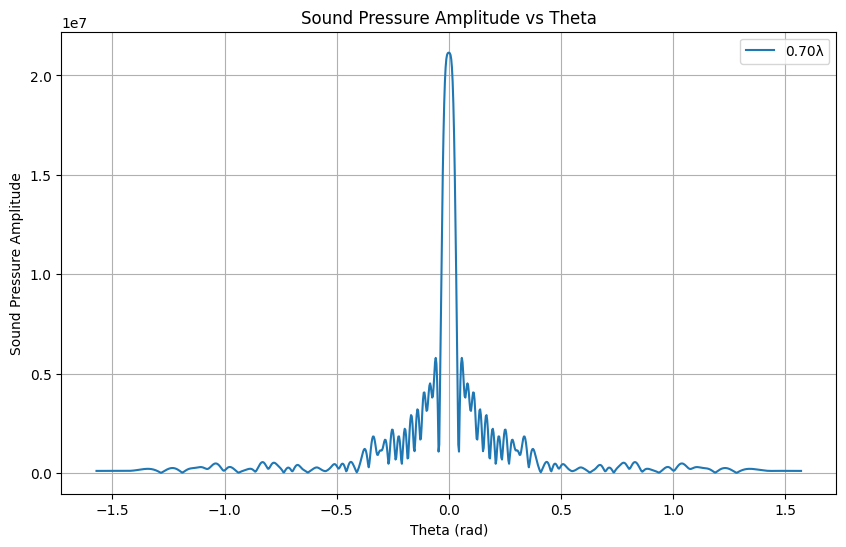

主瓣平均声压: 20899976.873885
旁瓣平均声压: 1402417.971039


In [83]:
plt.figure(figsize=(10, 6))   

# 计算每个 theta 对应的声压幅值
pressure_values = []
for theta in theta_values:
    pressure = annular_array_pressure(Ri_list,Ro_list, F, r, m, theta, phi, t)
    pressure_amplitude = np.abs(pressure)
    pressure_values.append(pressure_amplitude)
    # 绘制声压随 theta 的变化曲线    
plt.plot(theta_values, pressure_values,label='%.2fλ'%n)
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show()    

# 调用评价函数
mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
print(f"主瓣平均声压: {mainlobe_avg:.6f}")
print(f"旁瓣平均声压: {sidelobe_avg:.6f}")

In [84]:
from scipy.signal import find_peaks

def find_all_peaks(pressure_values):
    """
    寻找压力值列表中的所有峰值。

    参数:
    pressure_values (list): 包含压力值的列表。

    返回:
    list: 包含所有峰值的列表。
    """
    peaks, _ = find_peaks(pressure_values)
    return [pressure_values[i] for i in peaks]

def Sound_Pressure_delta(m, F, r, R_max, delta_d, theta, phi, t):
    # 定义 theta 范围
    theta_values = np.linspace(-np.pi/2 , np.pi /2, 1000)

    # 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
    delta_d_array = np.linspace(0.4 , 1 , 5)
    
    Rin_list = np.zeros(m)
    Rout_list = np.zeros(m)
    mainlobe_avg_list = []
    sidelobe_avg_list = []

    # 开始绘制不同 delta_d 下的声压曲线
    plt.figure(figsize=(20, 6))
    # 设置图片清晰度
    plt.rcParams['figure.dpi'] = 100

    for del_d in delta_d_array:
        # 调用函数计算圆环内外径
        Rin_list, Rout_list = calculate_annular_radii(R_max, m, del_d,Nmax)
        # 调用函数绘制圆环阵列
        # plot_annular_array(Rin_list, Rout_list, R_max, delta_d, colors)
        # 计算每个 theta 对应的声压幅值
        pressure_values = []
        for the_ta in theta_values:
            pressure = annular_array_pressure(Rin_list,Rout_list,F, r, m, the_ta, phi, t)
            pressure_amplitude = np.abs(pressure)
            pressure_values.append(pressure_amplitude)
        # 将 theta 从弧度转换为角度
        theta_values_deg = np.rad2deg(theta_values)
        # 绘制声压随 theta（角度）的变化曲线
        plt.plot(theta_values_deg, pressure_values, label='{:.2f}λ'.format(del_d/lambda_))
        
        # 找出所有峰值
        peak_values = find_all_peaks(pressure_values)
        
        if len(peak_values) >= 2:
            # 对峰值进行排序
            sorted_peak_indices = np.argsort(peak_values)
            second_max_peak_index = sorted_peak_indices[-2]
            second_max_peak_original_index = np.where(np.array(pressure_values) == peak_values[second_max_peak_index])[0][0]
            
            # 找出最大值
            max_index = np.argmax(pressure_values)
            
            # 打印信息
            print(f"最大值索引: {theta_values_deg[max_index]}", f"最大值: {pressure_values[max_index]:.2e}")
            print(f"第二大峰值索引: {theta_values_deg[second_max_peak_original_index]}", f"第二大峰值: {pressure_values[second_max_peak_original_index]:.2e}")
            
            # 标记最大值和第二大峰值
            plt.text(theta_values_deg[max_index], pressure_values[max_index], f'Max: {max_index:.2e}', ha='center', va='bottom')
            plt.text(theta_values_deg[second_max_peak_original_index], pressure_values[second_max_peak_original_index], f'Second : {second_max_peak_original_index:.2e}', ha='center', va='bottom')
        
        # 调用评价函数
        mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
        mainlobe_avg_list.append(mainlobe_avg)
        sidelobe_avg_list.append(sidelobe_avg)
        #print(f"主瓣平均声压: {mainlobe_avg:.6f}")
        #print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
        
    plt.xlabel('Theta (rad)')
    plt.ylabel('Sound Pressure Amplitude')
    plt.title('Sound Pressure Amplitude vs Theta')
    plt.legend()
    plt.grid(True)
    plt.show() 

""" 
    # 绘制主瓣平均声压柱状图
    x_pos = np.arange(len(delta_d_array))
    x_data = [f'{v:.3f}' for v in delta_d_array / lambda_]

    fig,ax1 = plt.subplots()
    fig.set_size_inches(20, 6)
    ax1.set_xticks(x_pos, x_data)

    ax1.plot(x_pos, mainlobe_avg_list,color='red')
    for i, v in enumerate(mainlobe_avg_list):
        ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
    ax1.set_xlabel('delta_d(λ)')
    ax1.set_ylabel('Mainlobe Average Sound Pressure')
    ax1.legend('Mainlobe')
    # plt.xlabel('delta_d')
    # plt.title('Mainlobe Average Sound Pressure')    
    # 显示图表
    # plt.show()
        
    # plt.figure(figsize=(20, 6))    
    # plt.xticks(x_pos, x_data)
    ax2 = ax1.twinx()
    ax2.plot(x_pos, sidelobe_avg_list,color='blue')
    ax2.set_ylabel('Sidelobe Average Sound Pressure')
    for i, v in enumerate(sidelobe_avg_list):
        ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
    ax2.legend('Sidelobe')    
    # plt.xlabel('delta_d')
    # plt.title('Sidelobe Average Sound Pressure')
    # 显示图表
    plt.show() """

" \n    # 绘制主瓣平均声压柱状图\n    x_pos = np.arange(len(delta_d_array))\n    x_data = [f'{v:.3f}' for v in delta_d_array / lambda_]\n\n    fig,ax1 = plt.subplots()\n    fig.set_size_inches(20, 6)\n    ax1.set_xticks(x_pos, x_data)\n\n    ax1.plot(x_pos, mainlobe_avg_list,color='red')\n    for i, v in enumerate(mainlobe_avg_list):\n        ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')\n    ax1.set_xlabel('delta_d(λ)')\n    ax1.set_ylabel('Mainlobe Average Sound Pressure')\n    ax1.legend('Mainlobe')\n    # plt.xlabel('delta_d')\n    # plt.title('Mainlobe Average Sound Pressure')    \n    # 显示图表\n    # plt.show()\n        \n    # plt.figure(figsize=(20, 6))    \n    # plt.xticks(x_pos, x_data)\n    ax2 = ax1.twinx()\n    ax2.plot(x_pos, sidelobe_avg_list,color='blue')\n    ax2.set_ylabel('Sidelobe Average Sound Pressure')\n    for i, v in enumerate(sidelobe_avg_list):\n        ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')\n    ax2.legend('Sidelobe')    \n    # plt.xl

Fc =  0.01 rc =  0.01 Rm =  0.007 ns =  6
最大值索引: 0.09009009009008323 最大值: 3.03e+07
第二大峰值索引: -2.2522522522522586 第二大峰值: 1.49e+07
最大值索引: 0.09009009009008323 最大值: 3.87e+07
第二大峰值索引: -2.432432432432438 第二大峰值: 1.04e+07
最大值索引: 0.09009009009008323 最大值: 4.11e+07
第二大峰值索引: 2.7927927927927834 第二大峰值: 5.41e+06
最大值索引: 0.09009009009008323 最大值: 3.31e+07
第二大峰值索引: -3.513513513513513 第二大峰值: 4.57e+06
最大值索引: -0.09009009009009594 最大值: 1.81e+07
第二大峰值索引: -3.513513513513513 第二大峰值: 4.60e+06


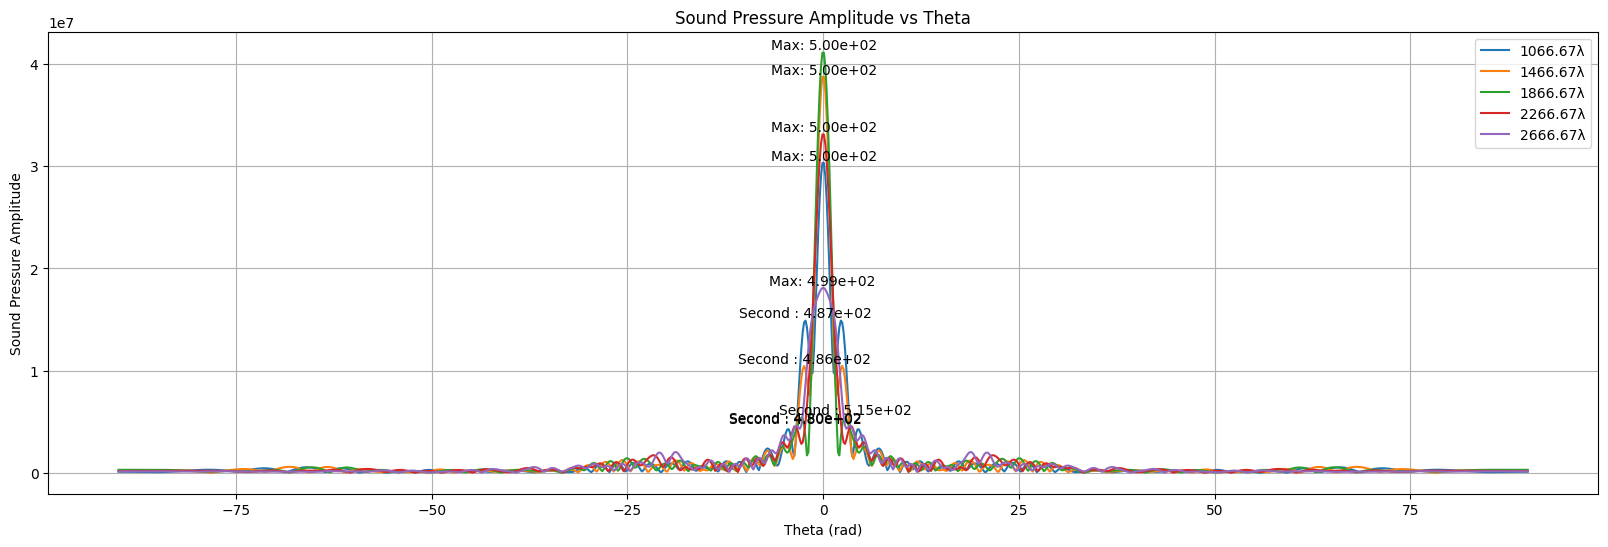


Fc =  0.015 rc =  0.015 Rm =  0.007 ns =  6
最大值索引: 2.072072072072067 最大值: 5.14e+06
第二大峰值索引: -2.0720720720720798 第二大峰值: 5.14e+06
最大值索引: 2.072072072072067 最大值: 5.52e+06
第二大峰值索引: -2.0720720720720798 第二大峰值: 5.52e+06
最大值索引: 0.09009009009008323 最大值: 7.12e+06
第二大峰值索引: -1.8918918918919003 第二大峰值: 4.66e+06
最大值索引: 0.09009009009008323 最大值: 9.48e+06
第二大峰值索引: 3.693693693693692 第二大峰值: 4.83e+06
最大值索引: 0.09009009009008323 最大值: 9.50e+06
第二大峰值索引: -3.513513513513513 第二大峰值: 6.36e+06


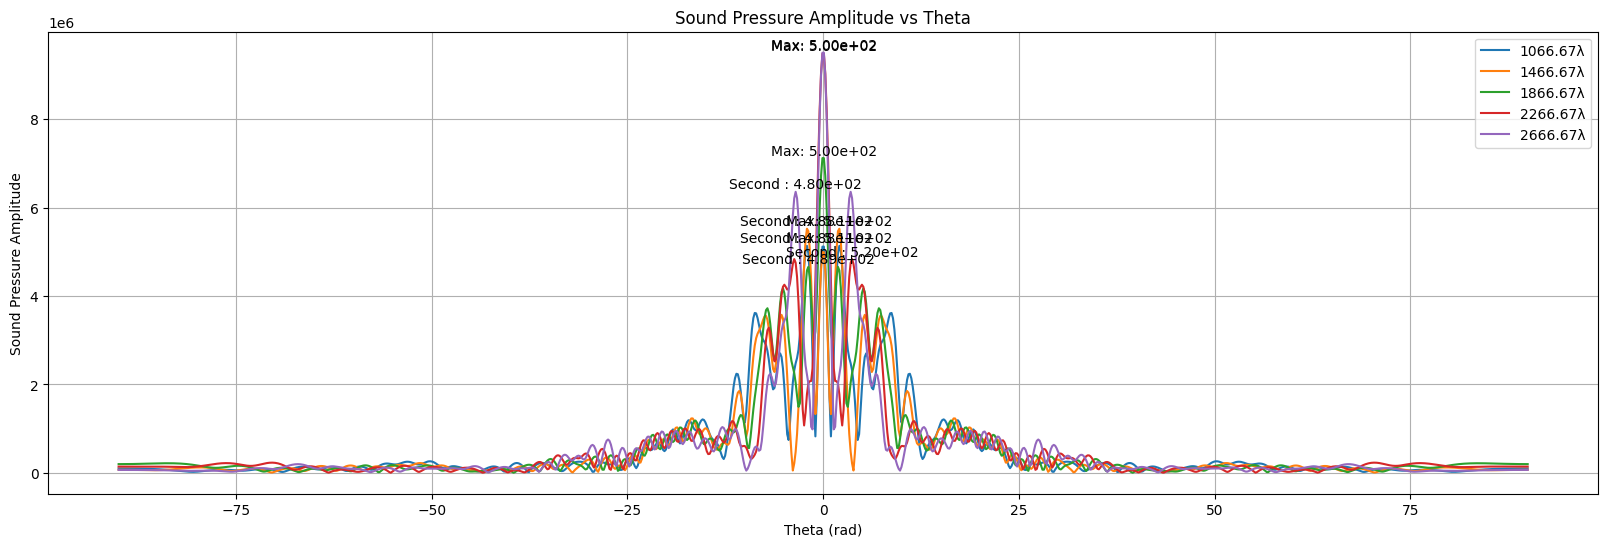


Fc =  0.019999999999999997 rc =  0.019999999999999997 Rm =  0.007 ns =  6
最大值索引: -1.8918918918919003 最大值: 3.12e+06
第二大峰值索引: 1.8918918918918877 第二大峰值: 3.12e+06
最大值索引: 11.801801801801792 最大值: 2.84e+06
第二大峰值索引: -11.801801801801806 第二大峰值: 2.84e+06
最大值索引: 0.09009009009008323 最大值: 3.89e+06
第二大峰值索引: 11.441441441441436 第二大峰值: 2.63e+06
最大值索引: 0.09009009009008323 最大值: 4.73e+06
第二大峰值索引: -3.333333333333334 第二大峰值: 2.76e+06
最大值索引: 0.09009009009008323 最大值: 4.49e+06
第二大峰值索引: -8.018018018018017 第二大峰值: 3.06e+06


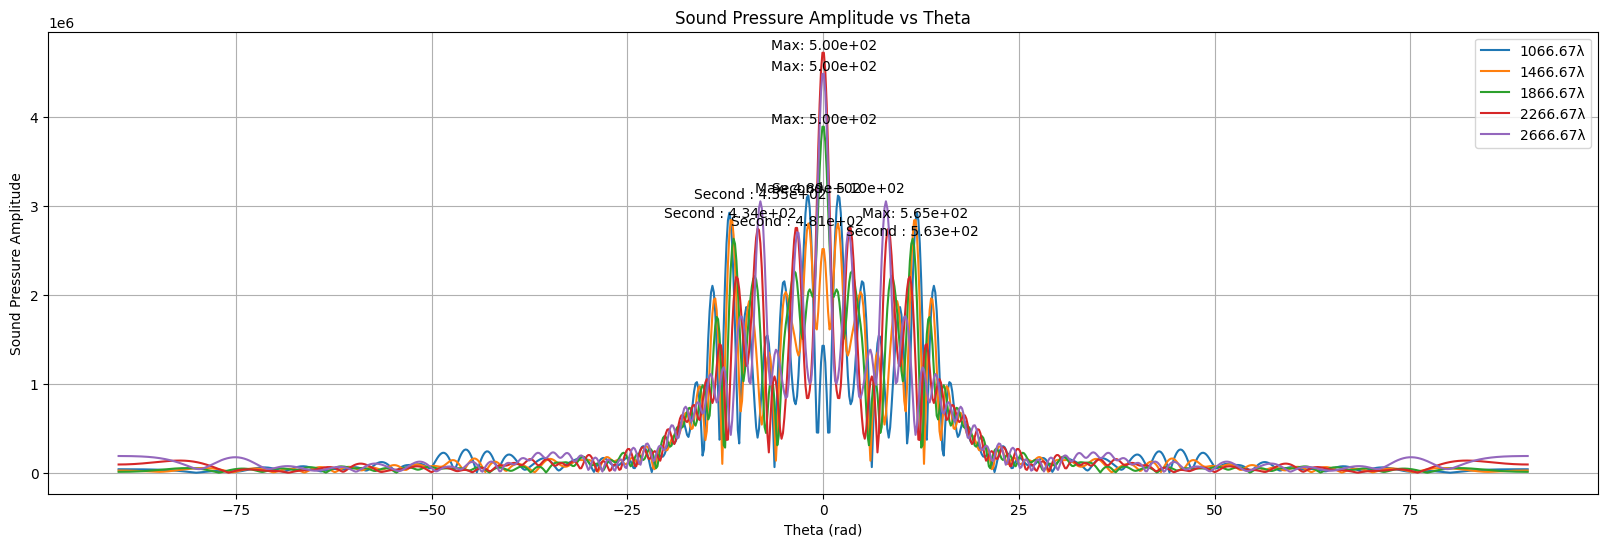


Fc =  0.024999999999999998 rc =  0.024999999999999998 Rm =  0.007 ns =  6
最大值索引: 0.09009009009008323 最大值: 3.72e+06
第二大峰值索引: -3.513513513513513 第二大峰值: 2.26e+06
最大值索引: -0.09009009009009594 最大值: 3.57e+06
第二大峰值索引: -3.333333333333334 第二大峰值: 2.13e+06
最大值索引: -0.09009009009009594 最大值: 3.05e+06
第二大峰值索引: -11.441441441441448 第二大峰值: 2.04e+06
最大值索引: 11.261261261261255 最大值: 2.27e+06
第二大峰值索引: -11.261261261261268 第二大峰值: 2.27e+06
最大值索引: -10.90090090090091 最大值: 2.35e+06
第二大峰值索引: 10.900900900900897 第二大峰值: 2.35e+06


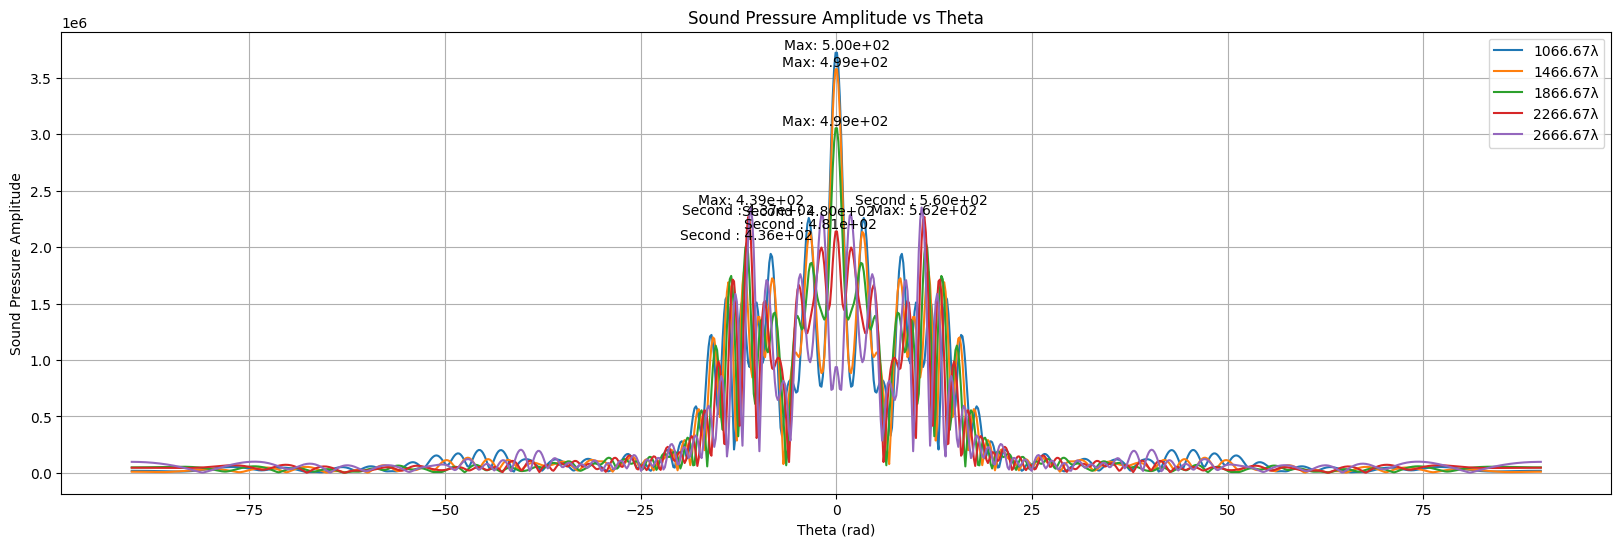


Fc =  0.03 rc =  0.03 Rm =  0.007 ns =  6
最大值索引: -1.8918918918919003 最大值: 2.21e+06
第二大峰值索引: 1.8918918918918877 第二大峰值: 2.21e+06
最大值索引: -1.8918918918919003 最大值: 1.96e+06
第二大峰值索引: 1.8918918918918877 第二大峰值: 1.96e+06
最大值索引: -0.09009009009009594 最大值: 1.98e+06
第二大峰值索引: -8.018018018018017 第二大峰值: 1.74e+06
最大值索引: -0.09009009009009594 最大值: 2.58e+06
第二大峰值索引: 3.333333333333321 第二大峰值: 1.88e+06
最大值索引: 0.09009009009008323 最大值: 2.85e+06
第二大峰值索引: -3.1531531531531547 第二大峰值: 1.88e+06


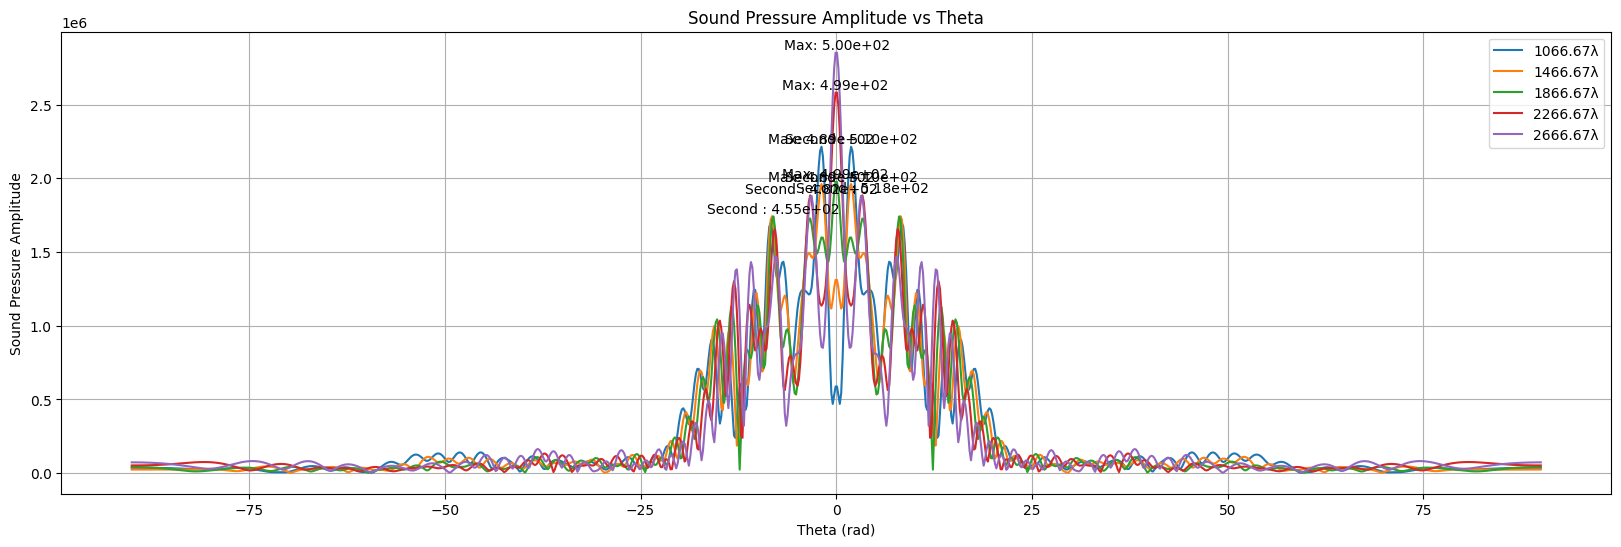

" for i in range(len(Fc)):\n    for j in range(len(rc)):\n        print('Fc = ',Fc[i],'rc = ',rc[j],'Rm = ',Rm, 'ns = ', ns[0])\n        Sound_Pressure_delta(m=ns[0], F=Fc[i],r=rc[j],R_max=Rm,delta_d=None,theta=None,phi=0,t=0)\n        print('')  "

In [85]:
Fc = np.linspace(10e-3,30e-3,5)
rc = np.linspace(10e-3,30e-3,5)

Rm = np.linspace(7e-3,10e-3,1)
ns = np.arange(6,11,1)
for i in range(len(Fc)):
    for j in range(len(Rm)):
        print('Fc = ',Fc[i],'rc = ',Fc[i],'Rm = ',Rm[j], 'ns = ', ns[0])
        Sound_Pressure_delta(m=ns[0], F=Fc[i],r=Fc[i],R_max=Rm[j],delta_d=None,theta=None,phi=0,t=0)
        print('') 
            
""" for i in range(len(Fc)):
    for j in range(len(rc)):
        print('Fc = ',Fc[i],'rc = ',rc[j],'Rm = ',Rm, 'ns = ', ns[0])
        Sound_Pressure_delta(m=ns[0], F=Fc[i],r=rc[j],R_max=Rm,delta_d=None,theta=None,phi=0,t=0)
        print('')  """


主瓣平均声压: 35257842.826910
旁瓣平均声压: 982702.553028
主瓣平均声压: 35408768.704519
旁瓣平均声压: 985490.625123
主瓣平均声压: 22490287.783975
旁瓣平均声压: 1348915.446366
主瓣平均声压: 19541833.825974
旁瓣平均声压: 1515072.746133
主瓣平均声压: 46895951.451482
旁瓣平均声压: 1741062.978094
主瓣平均声压: 33406621.679209
旁瓣平均声压: 1860368.973133
主瓣平均声压: 14914460.460127
旁瓣平均声压: 2382718.129843
主瓣平均声压: 27144626.382037
旁瓣平均声压: 3056220.992505
主瓣平均声压: 17718304.382496
旁瓣平均声压: 2951266.609164
主瓣平均声压: 39233366.943469
旁瓣平均声压: 2917780.526869
主瓣平均声压: 50460750.780583
旁瓣平均声压: 3601719.529992
主瓣平均声压: 109670093.487754
旁瓣平均声压: 3574946.350422
主瓣平均声压: 104968829.614817
旁瓣平均声压: 3060257.323330
主瓣平均声压: 108216459.263635
旁瓣平均声压: 3962777.919854
主瓣平均声压: 136180882.134565
旁瓣平均声压: 3801813.047649
主瓣平均声压: 130385683.922160
旁瓣平均声压: 3776598.958935
主瓣平均声压: 106738310.051322
旁瓣平均声压: 5354799.202426
主瓣平均声压: 110868119.590257
旁瓣平均声压: 5187582.135872
主瓣平均声压: 167293758.813052
旁瓣平均声压: 4657167.983910
主瓣平均声压: 235639033.484773
旁瓣平均声压: 4512573.824919


<Figure size 1000x600 with 0 Axes>

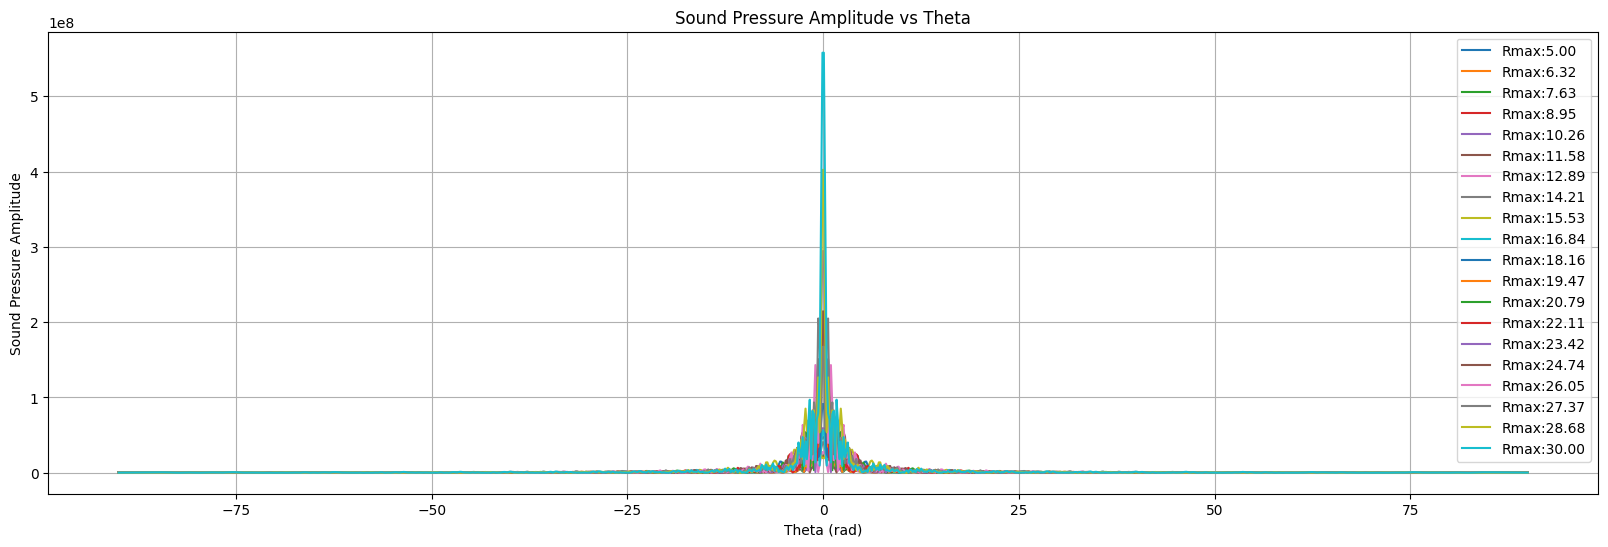

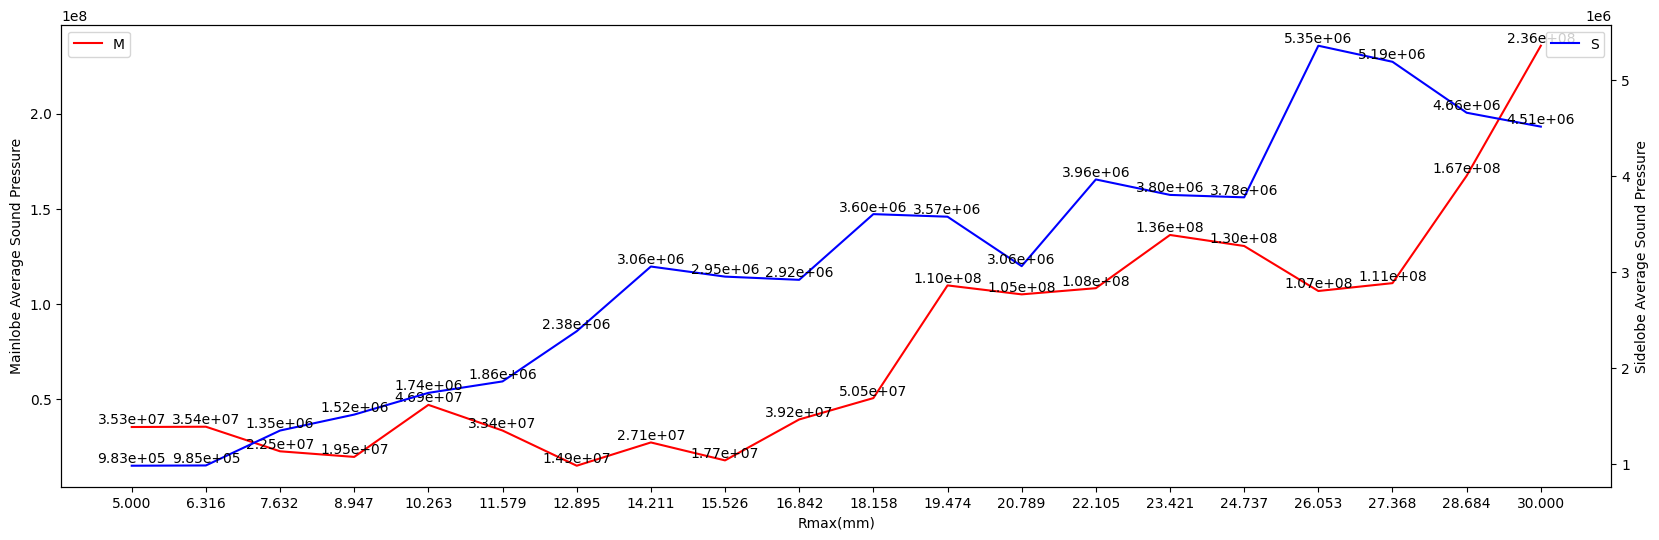

In [86]:
plt.figure(figsize=(10, 6))   

# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
Rmax_d_array = np.linspace(5e-3, 30e-3, 20)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(20, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

for Rmax in Rmax_d_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii(Rmax, m, n,Nmax)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值
    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list,a2_list, F, r, m, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='Rmax:{:.2f}'.format(Rmax*1e3))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(Rmax_d_array))
x_data = [f'{v:.3f}' for v in Rmax_d_array*1e3]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)
ax1.set_xticks(x_pos, x_data)

ax2 = ax1.twinx()
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('Rmax(mm)')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')
# plt.xlabel('delta_d')
# plt.title('Mainlobe Average Sound Pressure')    
# 显示图表
# plt.show()
    
# plt.figure(figsize=(20, 6))    
# plt.xticks(x_pos, x_data)
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
ax2.set_ylabel('Sidelobe Average Sound Pressure')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.legend('Sidelobe')    
# plt.xlabel('delta_d')
# plt.title('Sidelobe Average Sound Pressure')
# 显示图表
plt.show()

In [87]:
plt.figure(figsize=(20, 6))   

# 固定 r、phi 和 t 的值
F = 15e-3
r = F  # 可根据需要调整 r 的值
phi = 0
t = 0
pressure = 0

delta_d = lambda_ * 0.7
# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
we_d_array = np.arange(lambda_  , lambda_  * 10, lambda_ * 0.5)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(20, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100
# 定义 theta 范围
theta_values = np.linspace(-np.pi/8 , np.pi /8, 1000)

for we_d in we_d_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii_w(we_d, m, n,Nmax)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值

    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list,a2_list, F, r, m, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)   
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='W:{:.2f}λ'.format(we_d / lambda_))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(we_d_array))
x_data = [f'{v:.2f}' for v in we_d_array / lambda_]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)
ax1.set_xticks(x_pos, x_data)

ax2 = ax1.twinx()
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('W(λ)')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')
# plt.xlabel('delta_d')
# plt.title('Mainlobe Average Sound Pressure')    
# 显示图表
# plt.show()
    
# plt.figure(figsize=(20, 6))    
# plt.xticks(x_pos, x_data)
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
ax2.set_ylabel('Sidelobe Average Sound Pressure')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.legend('Sidelobe')    
# plt.xlabel('delta_d')
# plt.title('Sidelobe Average Sound Pressure')
# 显示图表
plt.show()



TypeError: calculate_annular_radii_w() takes 3 positional arguments but 4 were given

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

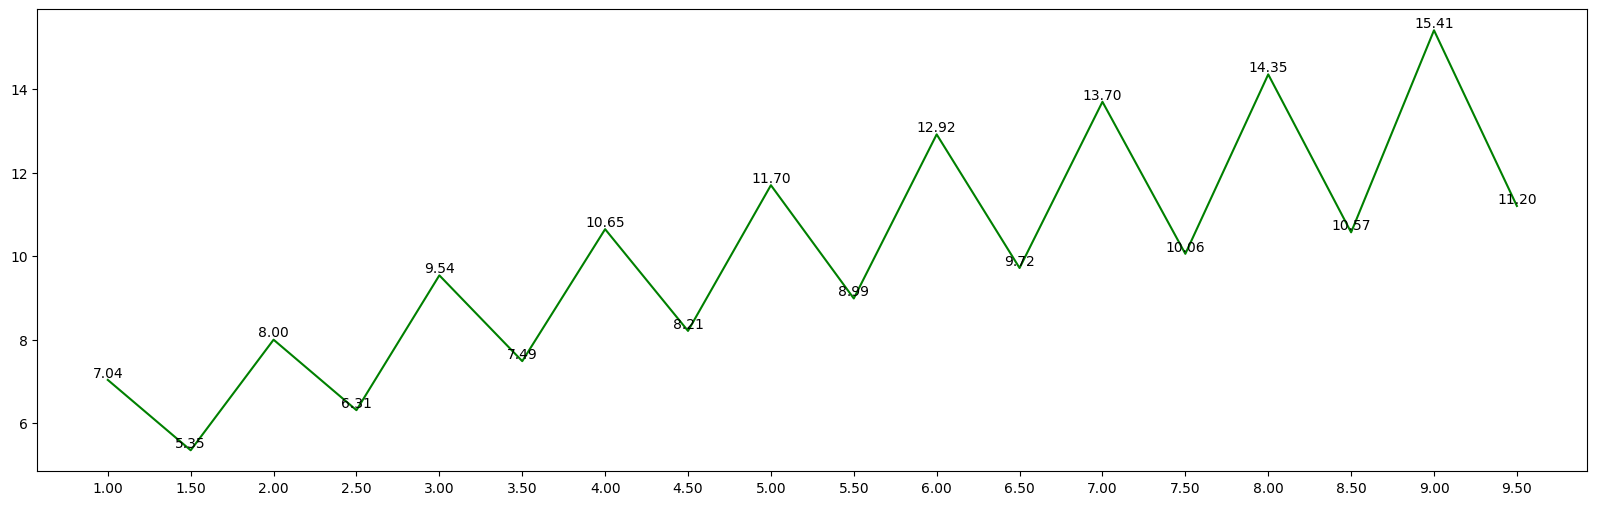

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(x_pos, x_data)
ratio = np.array(mainlobe_avg_list)/np.array(sidelobe_avg_list)
plt.plot(x_pos,ratio,color='green')
for i, v in enumerate(ratio):
    plt.text(x_pos[i], v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

主瓣平均声压: 175127316.510247
旁瓣平均声压: 7296204.573171
主瓣平均声压: 77520053.506714
旁瓣平均声压: 6531012.079783
主瓣平均声压: 49671114.134530
旁瓣平均声压: 3457048.337084
主瓣平均声压: 25482136.842539
旁瓣平均声压: 1772799.705248
主瓣平均声压: 29357350.218429
旁瓣平均声压: 6720412.381362
主瓣平均声压: 49254740.557781
旁瓣平均声压: 8666452.568139
主瓣平均声压: 108683036.497712
旁瓣平均声压: 10410761.029319
主瓣平均声压: 227790274.479257
旁瓣平均声压: 12150997.746130
主瓣平均声压: 284207721.413383
旁瓣平均声压: 13284375.190888
主瓣平均声压: 345732650.719580
旁瓣平均声压: 11414090.798665
主瓣平均声压: 276665371.094461
旁瓣平均声压: 13323557.470308
主瓣平均声压: 352434025.161366
旁瓣平均声压: 19785249.134661
主瓣平均声压: 623235104.692267
旁瓣平均声压: 23504153.084562
主瓣平均声压: 532559445.208649
旁瓣平均声压: 18272808.718441


<Figure size 1000x600 with 0 Axes>

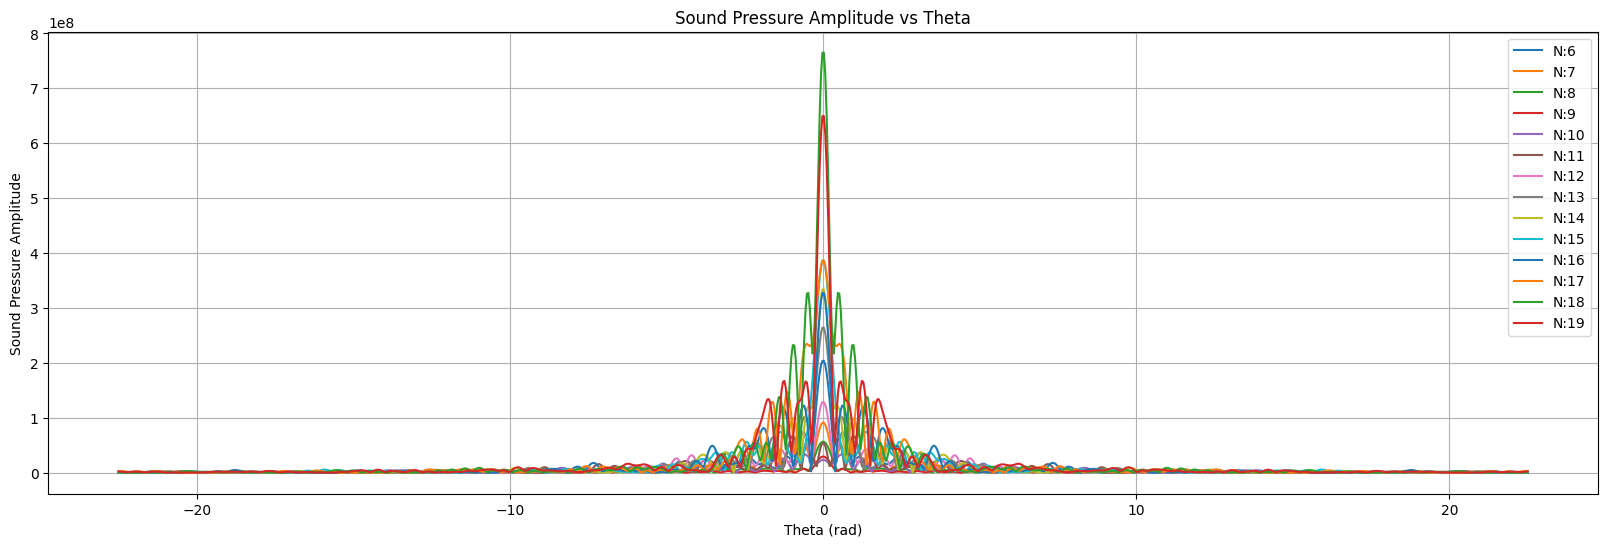

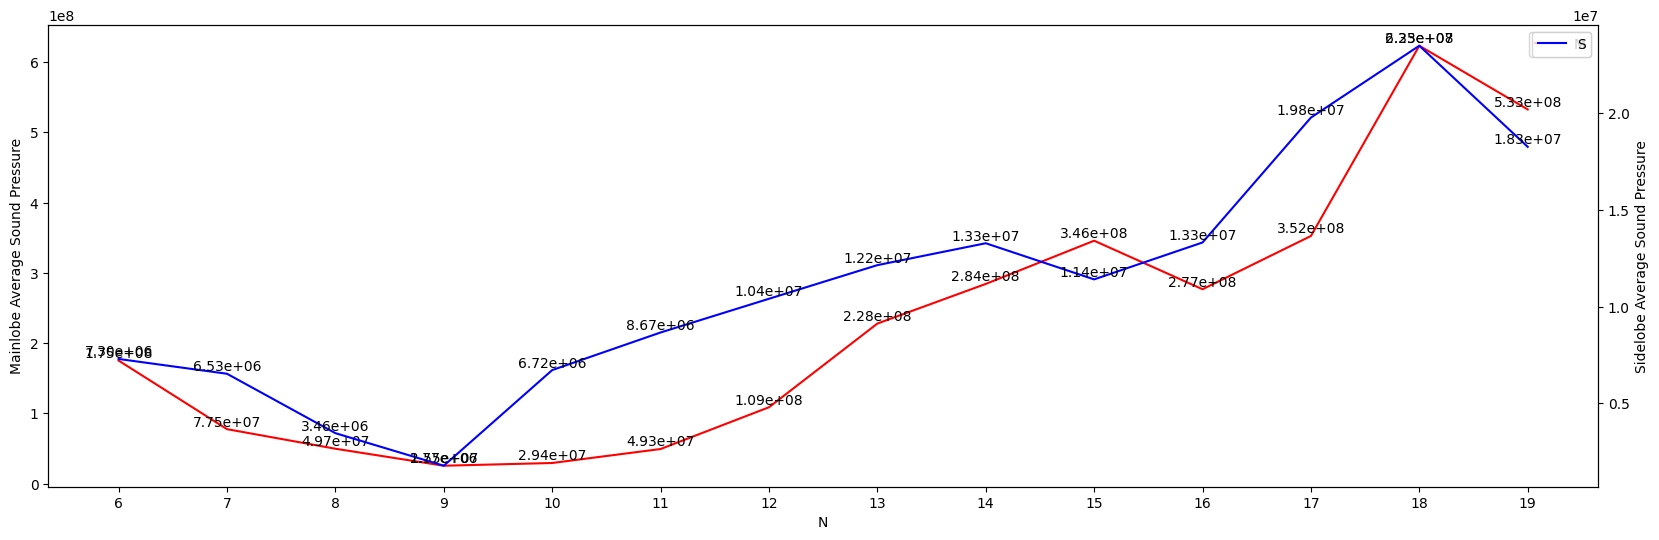

In [ ]:
plt.figure(figsize=(10, 6))   

# 固定 r、phi 和 t 的值
r = F  # 可根据需要调整 r 的值
phi = 0
t = 0
pressure = 0
R_max = 25e-3
# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
n_d_array = np.arange(6, 20, 1)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(20, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

for n_d in n_d_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii(R_max, m, n_d,Nmax)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值

    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list, a2_list, F, r, n_d, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)   
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='N:{:d}'.format(n_d))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(n_d_array))
x_data = [f'{v:d}' for v in n_d_array]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)
ax1.set_xticks(x_pos, x_data)

ax2 = ax1.twinx()
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('N')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')
# plt.xlabel('delta_d')
# plt.title('Mainlobe Average Sound Pressure')    
# 显示图表
# plt.show()
    
# plt.figure(figsize=(20, 6))    
# plt.xticks(x_pos, x_data)
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
ax2.set_ylabel('Sidelobe Average Sound Pressure')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.legend('Sidelobe')    
# plt.xlabel('delta_d')
# plt.title('Sidelobe Average Sound Pressure')
# 显示图表
plt.show()



主瓣平均声压: 415399151.231600
旁瓣平均声压: 12464904.251094
主瓣平均声压: 379404855.057067
旁瓣平均声压: 11799777.653209
主瓣平均声压: 226886649.857362
旁瓣平均声压: 12008071.990784
主瓣平均声压: 125940920.030001
旁瓣平均声压: 13752231.250814
主瓣平均声压: 166536687.055981
旁瓣平均声压: 9822038.529974
主瓣平均声压: 249923801.285121
旁瓣平均声压: 8493752.823495
主瓣平均声压: 243068298.428190
旁瓣平均声压: 7500366.425382
主瓣平均声压: 50137365.697102
旁瓣平均声压: 8728503.715140
主瓣平均声压: 145831094.813500
旁瓣平均声压: 6093837.486830
主瓣平均声压: 92684640.764903
旁瓣平均声压: 7897657.964054
主瓣平均声压: 305009791.621593
旁瓣平均声压: 4735575.174056
主瓣平均声压: 88158973.713911
旁瓣平均声压: 6708318.273445
主瓣平均声压: 75830045.516008
旁瓣平均声压: 5952772.909725
主瓣平均声压: 125191319.616775
旁瓣平均声压: 5365869.882795
主瓣平均声压: 36893541.032953
旁瓣平均声压: 6649241.656601
主瓣平均声压: 177386157.638005
旁瓣平均声压: 5715667.320252
主瓣平均声压: 215946299.332199
旁瓣平均声压: 4082785.246743
主瓣平均声压: 50761910.473692
旁瓣平均声压: 6256062.516925
主瓣平均声压: 55032262.997570
旁瓣平均声压: 4875239.207228
主瓣平均声压: 48539467.310302
旁瓣平均声压: 5235281.382570


<Figure size 1000x600 with 0 Axes>

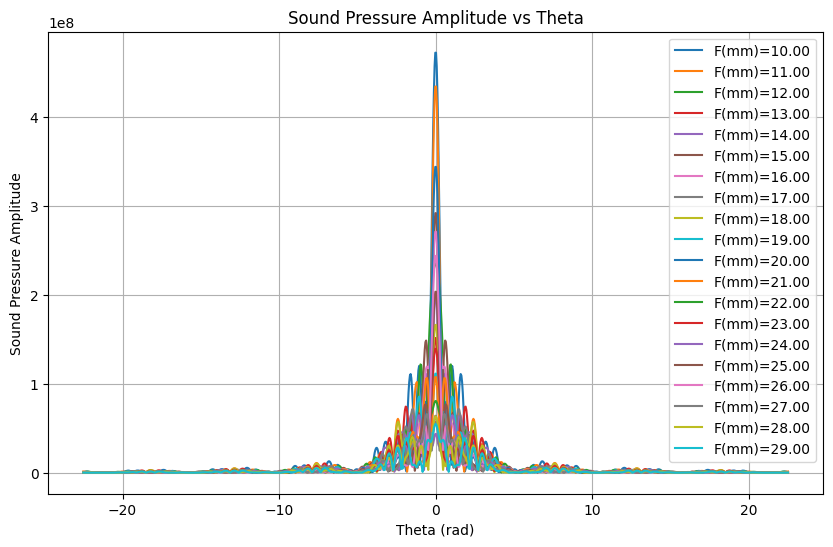

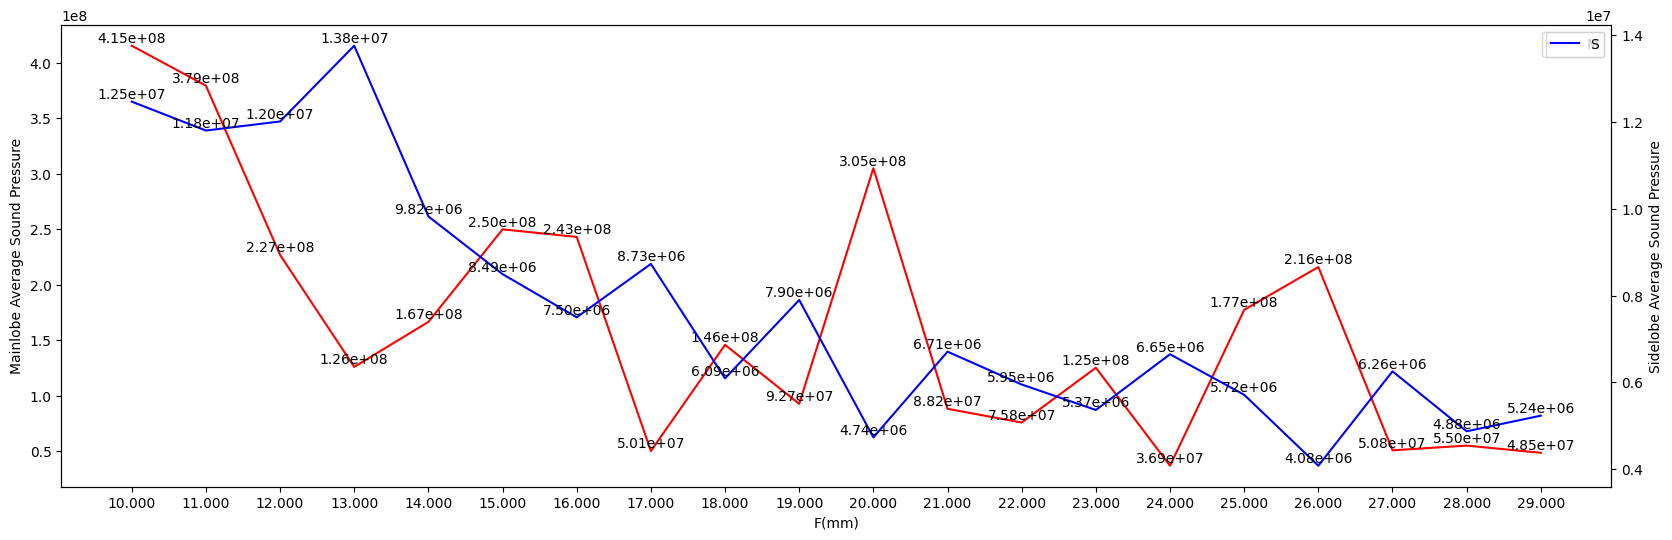

In [ ]:
plt.figure(figsize=(10, 6))   

# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
F_array = np.arange(10e-3, 30e-3, 1e-3)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(10, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

for F_d in F_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii(R_max, m, n,Nmax)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值
    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list, a2_list, F_d, F_d, m, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='F(mm)={:.2f}'.format(F_d*1000))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(F_array))
x_data = [f'{v:.3f}' for v in F_array*1e3]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)

ax1.set_xticks(x_pos, x_data)
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('F(mm)')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')

ax2 = ax1.twinx()
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.set_ylabel('Sidelobe Average Sound Pressure')    
ax2.legend('Sidelobe')

plt.show()


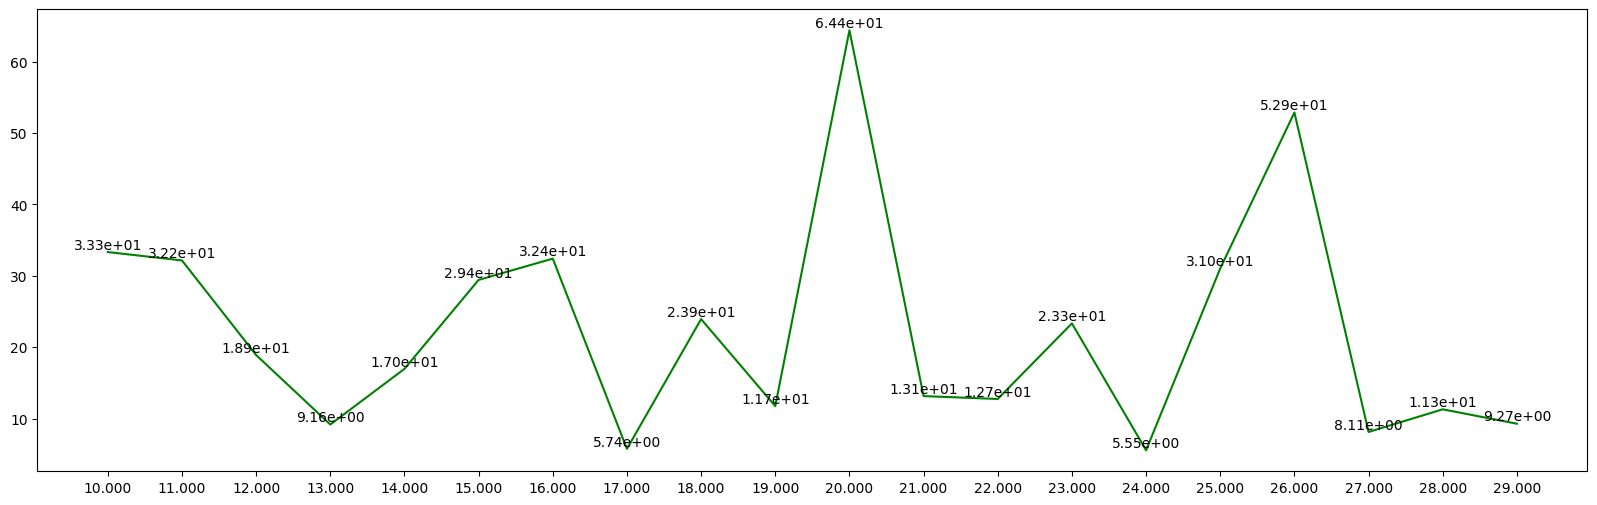

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(x_pos, x_data)
ratio = np.array(mainlobe_avg_list)/np.array(sidelobe_avg_list)
plt.plot(x_pos,ratio,color='green')
for i, v in enumerate(ratio):
    plt.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

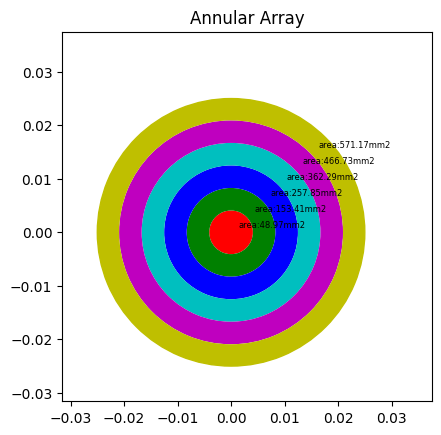

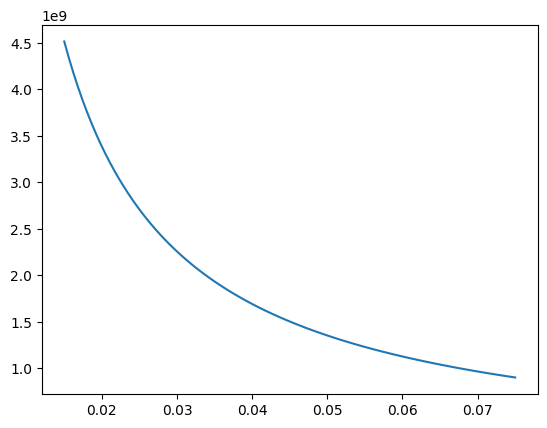

In [ ]:
plt.figure(figsize=(10, 6))   

# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
dis_array = np.linspace(F, 5*F, 100)

a1_list = []
a2_list = []

delta_d = lambda_ *2/5
# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(10, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100
# 调用函数计算圆环内外径
a1_list, a2_list = calculate_annular_radii(R_max, m, n,Nmax)
# 调用函数绘制圆环阵列
plot_annular_array(a1_list, a2_list, colors)
# 计算每个 theta 对应的声压幅值
pressure_values = []
    
for dis in dis_array:
    pressure = annular_array_pressure(a1_list, a2_list, F, dis, m, 0, 0, t)
    pressure_amplitude = np.abs(pressure)
    pressure_values.append(pressure_amplitude)
plt.plot(dis_array, pressure_values)
plt.show() 

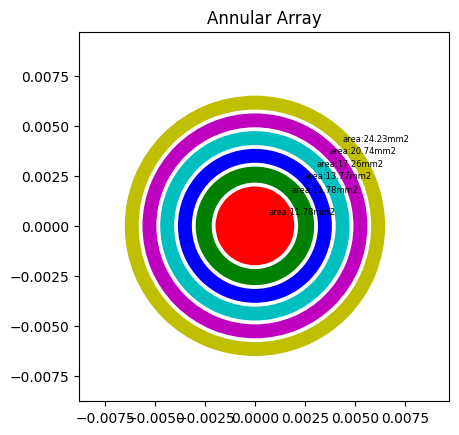

11.780972450961725
11.780972450961723
13.768579201428873
17.25538080410981
20.74218240679076
24.228984009471702
          0         1
0  0.000000  1.936492
1  2.198992  2.930113
2  3.192613  3.817781
3  4.080281  4.705449
4  4.967949  5.593118
5  5.855618  6.480786


In [101]:
# 近场声压计算
# 计算相位延迟
F = 10e-3
R_max = 7e-3
Nmax = 10e-3
m = 6
n = 0.7
delta_d = n * lambda_

r_values = np.linspace(0.1*lambda_, F * 5,1000)  # 不同的距离 r
pressure_amplitudes = []

a1_list = np.zeros(m)
a2_list = np.zeros(m)

# 调用函数计算圆环内外径
a1_list, a2_list = calculate_annular_radii(R_max, m, n,Nmax)
# 调用函数绘制圆环阵列
plot_annular_array(a1_list, a2_list, colors)
a_list = np.stack((a1_list, a2_list),axis=1)
df_a = pd.DataFrame(a_list)
for i,j in a_list:
    t_r = (j**2 - i**2)*np.pi*1e6
    print(t_r)

print(df_a*1e3)

F(mm):10.000
N: 0, r(mm):9.890 Max=3.000e+06 r(mm):4.789 Min=4.345e+04
N: 1, r(mm):9.640 Max=3.000e+06 r(mm):4.289 Min=1.266e+04
N: 2, r(mm):11.140 Max=3.000e+06 r(mm):4.689 Min=2.549e+04
N: 3, r(mm):13.991 Max=3.000e+06 r(mm):5.839 Min=1.579e+04
N: 4, r(mm):16.792 Max=3.000e+06 r(mm):7.039 Min=2.082e+01
N: 5, r(mm):19.592 Max=3.000e+06 r(mm):8.240 Min=1.145e+04


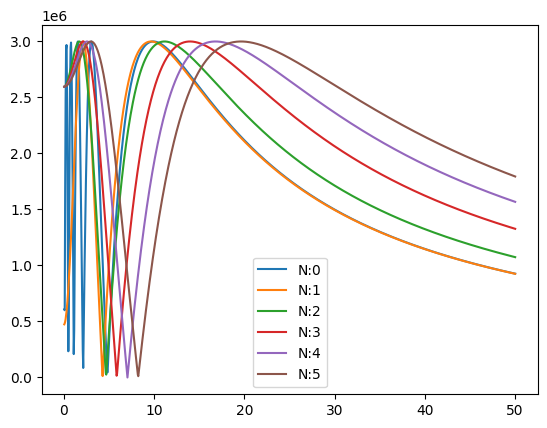

NF:20.566


In [102]:
# 计算单个圆环的声压
# 定义声压公式，考虑分母为 0 的情况
def annular_array_pressure_axis_delay(a1_list,a2_list, m, index, F, r, t, tdelay):
    p_total = 0
    epsilon = 1e-20  # 一个极小值，用于避免分母为 0
    
    # print("Rm_max: ", Rm_max)
    if index > m:
        print("index big!")
    else:
            a1 = a1_list[index]
            a2 = a2_list[index]
                    
            delay_temp = tdelay * (m-1) - tdelay * i
            #print("delay_temp: ", delay_temp)
            t1 = np.sqrt(a1 ** 2 + r ** 2) 
            t2 = np.sqrt(a2 ** 2 + r ** 2)
            
            p = (rho0 * c* u) * np.exp(1j * w * t)* np.exp(-1j * w * delay_temp)* (np.exp(-1j * k * t2) - np.exp(-1j * k * t1) )
            p_total += p

    NFmax = (a2**2-a1**2)/lambda_
    #print("index: %d"%index,"a1: %.3f"%a1,"a2: %.3f"%a2,"NF: %.3fmm"%(NFmax*1e3))
    return p_total, NFmax

pressure_amplitudes = []
pressure_amplitude_max = []

F_list = np.linspace(10e-3,21e-3,1)

t_delay_base = 300e-9

for i in range(len(F_list)):
    pressure_amplitudes = []
    f_d = F_list[i]
    t_del = t_delay_base - i * 10e-9
    # print("t_del: ", t_del)
    print("F(mm):%.3f"%(f_d*1e3))
    for j in range(m):
        for r in r_values:
            pressure,nf_max = annular_array_pressure_axis_delay(a1_list, a2_list, m, j, f_d, r ,0,0)
            pressure_amplitude = np.abs(pressure)
            pressure_amplitudes.append(pressure_amplitude)

        # 使用 find_peaks 函数寻找极大值
        peaks, _ = find_peaks(pressure_amplitudes)
        peak_values = [pressure_amplitudes[peak] for peak in peaks]

        # 使用 find_peaks 函数寻找波谷（对数据取负）
        valleys, _ = find_peaks(-np.array(pressure_amplitudes))
        valley_values = [pressure_amplitudes[valley] for valley in valleys]

        max_value = peak_values[-1]
        index_max = peaks[-1]

        min_value  = valley_values[-1]
        index_min  = valleys[-1]
        # print("F(mm):%.3f"%(f_d*1e3))
        print("N: %d, r(mm):%.3f"%(j, r_values[index_max]*1e3), "Max={:.3e}".format(max_value), "r(mm):%.3f"%(r_values[index_min]*1e3), "Min={:.3e}".format(min_value))

        # pressure_amplitude_max.append(max_value)
        # plt.text(r_values[index], pressure_amplitudes[index], f'{max_value:.2e}', ha='center', va='bottom', color='red', fontsize=6)
        plt.plot(r_values*1e3, pressure_amplitudes,label='N:{:.0f}'.format(j))  
        pressure_amplitudes = []
        

    plt.legend()
    plt.show()

print("NF:%.3f"%(nf_max*1e3))

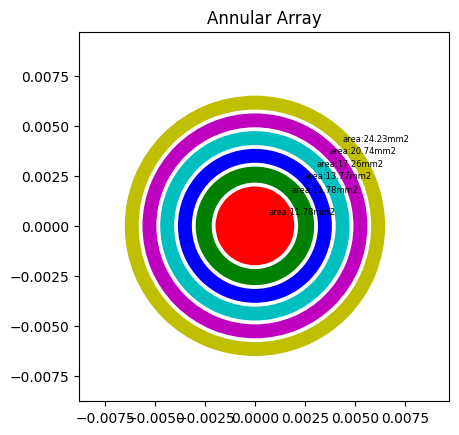

S: 1.1780972450961725e-05 Impedance: 73.61397903398776j
S: 1.1780972450961723e-05 Impedance: 82.26971662347137j
S: 1.3768579201428873e-05 Impedance: 70.6747348671049j
S: 1.725538080410981e-05 Impedance: 56.446981881860445j
S: 2.074218240679076e-05 Impedance: 46.98230314962077j
S: 2.4228984009471703e-05 Impedance: 40.23352552037744j


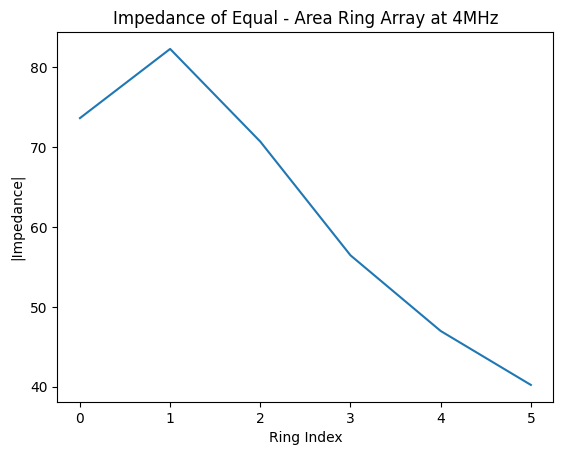

In [105]:
F = 20e-3
Nmax = 10e-3
R_max = 7e-3
m = 6
delta_d = 0.7 * lambda_

# PZT - 3型陶瓷参数
h15 = -2.6 * 10 ** 9  # 压电应力常数
beta11s = 1.23 * 10 ** (-9)  # 恒应变下的介电隔离率
rho = 7500  # 材料密度
C55D = 2.94 * 10 ** 10  # 恒电位下的弹性刚度常数

# 计算剪切波传播速度
Ct = (C55D / rho) ** 0.5
# 根据经验公式或相关理论，假设厚度与波长相关，这里简单假设厚度为1/4波长（实际需根据具体理论模型调整）
l = lambda_ / 4  # 根据频率调整厚度

# 计算剪切波波数
kt = w / Ct

# 定义计算tau的函数
def calculate_tau(a1, a2):
    return (9 * (a1 + a2) ** 2 * (a1 ** 2 + a2 ** 2)) / (8 * (a1 ** 2 + a1 * a2 + a2 ** 2) ** 2)


# 定义计算k15t的函数
def calculate_k15t(tau):
    return h15 / np.sqrt(beta11s * C55D * tau)

# 定义计算阻抗的函数
def calculate_impedance(k15t, kt, l, omega, C0):
    return 1 / (1j * omega * C0) * (1 - (k15t ** 2) * (np.tan(kt * l / 2) / (kt * l / 2)))

impedance = np.zeros(m, dtype=complex)
a1_list = np.zeros(m)
a2_list = np.zeros(m)

# 调用函数计算圆环内外径
a1_list, a2_list = calculate_annular_radii(R_max, m, n,Nmax)
# 调用函数绘制圆环阵列
plot_annular_array(a1_list, a2_list, colors)
# 计算每个圆环的阻抗
for i in range(m):
    # 计算每个圆环的面积作为振动横截面积S
    S = np.pi * (a2_list[i] ** 2 - a1_list[i] ** 2)
    # 根据公式计算C0
    C0 = S / (beta11s * l)
    tau = calculate_tau(a2_list[i], a1_list[i])
    k15t = calculate_k15t(tau)
    impedance[i] = calculate_impedance(k15t, kt, l, w, C0)
    print("S:", S, "Impedance:", impedance[i])
    
# 绘制圆环序号与阻抗模值的关系图
plt.plot(np.arange(0, m), np.abs(impedance))
plt.xlabel('Ring Index')
plt.ylabel('|Impedance|')
plt.title('Impedance of Equal - Area Ring Array at 4MHz')
plt.show()